# 1.&nbsp;Load Data

In [79]:
! pwd

/content


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [123]:
df = pd.read_csv('/content/data.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1,0.025000,-0.017969,0.023438,-0.042969,-0.001563,0.041406,0.027734,0.014453,0.025781,...,0.163250,0.037954,0.007015,0.011026,0.006441,0.006690,0.003455,0.001945,0.001913,1
1,1,0.007422,-0.110550,0.003516,-0.117970,-0.003906,0.114060,0.004297,-0.133590,-0.003516,...,0.092112,0.030866,0.012267,0.004948,0.002649,0.004028,0.002719,0.004620,0.002064,1
2,1,0.000781,-0.007422,-0.001953,-0.008203,-0.002734,0.005469,0.004687,-0.033594,0.002734,...,0.093553,0.056336,0.009689,0.004593,0.002575,0.002956,0.002281,0.003273,0.002248,1
3,1,0.040625,-0.077734,0.038281,-0.118360,-0.002344,0.116020,0.045703,-0.037891,0.046094,...,0.082603,0.021464,0.004947,0.004866,0.002528,0.004151,0.004215,0.003310,0.001849,1
4,1,0.017578,0.005078,0.015625,-0.012500,-0.001953,0.010547,0.028125,-0.033594,0.007812,...,0.068634,0.023027,0.009577,0.005303,0.002588,0.003319,0.004480,0.005150,0.003566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,3,0.000781,-0.019141,-0.008984,-0.019922,-0.009766,0.010156,-0.017578,-0.000391,-0.014453,...,0.033872,0.016044,0.017514,0.011223,0.005518,0.001604,0.003699,0.002921,0.003194,10
236,3,-0.055859,0.002344,-0.028516,0.058203,0.027344,-0.030859,-0.012891,0.008203,-0.009766,...,0.085237,0.029284,0.018743,0.004081,0.008107,0.004727,0.013117,0.005518,0.002529,10
237,3,-0.058984,-0.023828,-0.041406,0.035156,0.017578,-0.017578,-0.047266,0.001563,0.000000,...,0.066883,0.014357,0.002634,0.003580,0.006042,0.003435,0.013687,0.005000,0.001929,10
238,3,-0.033203,0.027344,0.010547,0.060547,0.043750,-0.016797,-0.017578,0.019922,-0.001953,...,0.062867,0.028269,0.012360,0.008847,0.006768,0.002351,0.005865,0.003046,0.002324,10


In [89]:
df.shape[1]

26

## 2.1&nbsp; X distribution 

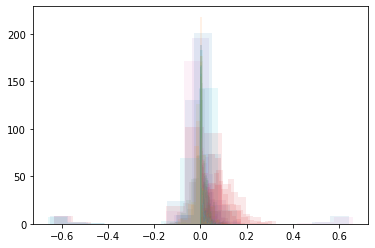

In [124]:
for i in range(1,df.shape[1]-1):
  plt.hist(df.iloc[:, i], alpha= 0.1)

In [125]:
# Normalization   - rescales the values into a range of [0,1]
min = df.iloc[:,:-1].min(axis=0)
max = df.iloc[:,:-1].max(axis=0)
df_n = df.copy()
df_n.iloc[:,:-1] = (df.iloc[:,:-1] - min) / (max - min)
df_n

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.0,0.216525,0.409343,0.676372,0.730043,0.849023,0.723004,0.219913,0.584873,0.614535,...,0.844353,0.396786,0.185958,0.263241,0.176490,0.139115,0.064132,0.048860,0.027822,1
1,0.0,0.194125,0.000000,0.589041,0.637153,0.845867,0.987200,0.190914,0.000000,0.474874,...,0.466455,0.312099,0.338189,0.089965,0.065677,0.081304,0.049618,0.127340,0.030319,1
2,0.0,0.185663,0.455976,0.565069,0.773101,0.847445,0.592323,0.191398,0.395054,0.504669,...,0.474110,0.616412,0.263463,0.079868,0.063524,0.058009,0.040981,0.087815,0.033359,1
3,0.0,0.236435,0.145094,0.741437,0.636670,0.847971,0.994327,0.242147,0.378078,0.711370,...,0.415942,0.199764,0.126006,0.087650,0.062136,0.083976,0.079127,0.088895,0.026756,1
4,0.0,0.207067,0.511244,0.642123,0.767779,0.848497,0.610789,0.220397,0.395054,0.528877,...,0.341736,0.218439,0.260235,0.100088,0.063907,0.065906,0.084349,0.142906,0.055147,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1.0,0.185663,0.404161,0.534247,0.758587,0.837976,0.609367,0.163848,0.526230,0.422734,...,0.157074,0.135007,0.490273,0.268857,0.149530,0.028658,0.068954,0.077504,0.049009,10
236,1.0,0.113488,0.499154,0.448629,0.855345,0.887950,0.460222,0.169647,0.560181,0.445080,...,0.429934,0.293197,0.525895,0.065249,0.225180,0.096471,0.254697,0.153699,0.038003,10
237,1.0,0.109506,0.383437,0.392125,0.826801,0.874799,0.508516,0.127115,0.533946,0.491634,...,0.332435,0.114851,0.058973,0.050976,0.164837,0.068417,0.265939,0.138490,0.028078,10
238,1.0,0.142358,0.609692,0.619864,0.858248,0.910043,0.511356,0.163848,0.606479,0.482323,...,0.311101,0.281070,0.340885,0.201136,0.186052,0.044871,0.111671,0.081166,0.034610,10


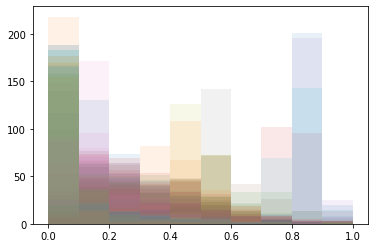

In [126]:
# X distribution after normalization
for i in range(1,df.shape[1]-1):
  plt.hist(df_n.iloc[:, i], alpha= 0.1)

In [127]:
# Standardization -  rescales data to have a mean of 0 and a standard deviation of 1
mean = df.iloc[:,:-1].mean(axis=0)
std = df.iloc[:,:-1].std(axis=0)
df_s = df.copy()
df_s.iloc[:,:-1] = (df.iloc[:,:-1] - mean) / std
df_s

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,-1.222191,0.084462,-0.636197,0.736171,-0.213651,0.130889,0.979077,0.131542,0.661921,1.404661,...,2.528397,0.474726,-0.822067,0.411805,0.014145,0.152612,-0.225762,-0.384763,-0.210307,1
1,-1.222191,-0.051320,-4.064024,0.191645,-0.783557,0.111715,2.591507,-0.054640,-5.527143,-0.059288,...,0.456104,0.020985,-0.000598,-0.556166,-0.585824,-0.209620,-0.326968,0.076930,-0.184161,1
2,-1.222191,-0.102616,-0.245689,0.042173,0.050522,0.121301,0.181514,-0.051537,-1.346725,0.253024,...,0.498081,1.651456,-0.403833,-0.612572,-0.597485,-0.355586,-0.387192,-0.155591,-0.152317,1
3,-1.222191,0.205158,-2.849006,1.141865,-0.786520,0.124498,2.635006,0.274286,-1.526365,2.419700,...,0.179101,-0.580887,-1.145581,-0.569097,-0.605000,-0.192882,-0.121199,-0.149238,-0.221476,1
4,-1.222191,0.027131,0.217125,0.522624,0.017871,0.127693,0.294215,0.134648,-1.346725,0.506776,...,-0.227825,-0.480831,-0.421257,-0.499617,-0.595412,-0.306105,-0.084782,0.168505,0.075884,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1.222191,-0.102616,-0.679591,-0.150009,-0.038526,0.063780,0.285538,-0.228413,0.041371,-0.605829,...,-1.240463,-0.927850,0.820074,0.443177,-0.131825,-0.539492,-0.192136,-0.216250,0.011591,10
236,1.222191,-0.540136,0.115884,-0.683853,0.555117,0.367370,-0.624719,-0.191180,0.400638,-0.371600,...,0.255831,-0.080287,1.012299,-0.694234,0.277763,-0.114592,1.103060,0.231995,-0.103678,10
237,1.222191,-0.564275,-0.853128,-1.036167,0.379992,0.287475,-0.329970,-0.464252,0.123022,0.116386,...,-0.278832,-1.035844,-1.507306,-0.773969,-0.048952,-0.290374,1.181450,0.142526,-0.207623,10
238,1.222191,-0.365129,1.041524,0.383830,0.572929,0.501585,-0.312637,-0.228413,0.890557,0.018790,...,-0.395821,-0.145263,0.013948,0.064868,0.065913,-0.437904,0.105735,-0.194707,-0.139210,10


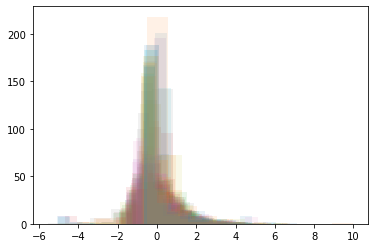

In [128]:
# X distribution after Standardization 
for i in range(1,df.shape[1]-1):
  plt.hist(df_s.iloc[:, i], alpha= 0.1)

## 2.2 &nbsp;y

In [ ]:
categories = [1,2,3,4,5,6,7,8,9,10]
cat_count = [sum(df.iloc[:,-1]==ele) for ele in categories]
print('categories:', categories)
print('cat_count:', cat_count)
print('sum:', sum(cat_count))

categories: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cat_count: [24, 24, 24, 24, 24, 24, 24, 24, 24, 24]
sum: 240


Text(0.5, 0, 'Category')

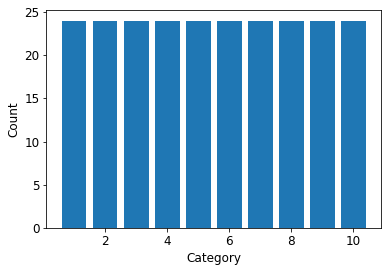

In [ ]:
plt.bar(categories, cat_count)
plt.ylabel('Count')
plt.xlabel('Category')

# 3.&nbsp;Base Model

## 3.1. &nbsp; X, y

In [129]:
X = df.iloc[:, :-1]
X

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,1,0.025000,-0.017969,0.023438,-0.042969,-0.001563,0.041406,0.027734,0.014453,0.025781,...,0.038673,0.163250,0.037954,0.007015,0.011026,0.006441,0.006690,0.003455,0.001945,0.001913
1,1,0.007422,-0.110550,0.003516,-0.117970,-0.003906,0.114060,0.004297,-0.133590,-0.003516,...,0.033866,0.092112,0.030866,0.012267,0.004948,0.002649,0.004028,0.002719,0.004620,0.002064
2,1,0.000781,-0.007422,-0.001953,-0.008203,-0.002734,0.005469,0.004687,-0.033594,0.002734,...,0.028156,0.093553,0.056336,0.009689,0.004593,0.002575,0.002956,0.002281,0.003273,0.002248
3,1,0.040625,-0.077734,0.038281,-0.118360,-0.002344,0.116020,0.045703,-0.037891,0.046094,...,0.033878,0.082603,0.021464,0.004947,0.004866,0.002528,0.004151,0.004215,0.003310,0.001849
4,1,0.017578,0.005078,0.015625,-0.012500,-0.001953,0.010547,0.028125,-0.033594,0.007812,...,0.028536,0.068634,0.023027,0.009577,0.005303,0.002588,0.003319,0.004480,0.005150,0.003566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,3,0.000781,-0.019141,-0.008984,-0.019922,-0.009766,0.010156,-0.017578,-0.000391,-0.014453,...,0.013007,0.033872,0.016044,0.017514,0.011223,0.005518,0.001604,0.003699,0.002921,0.003194
236,3,-0.055859,0.002344,-0.028516,0.058203,0.027344,-0.030859,-0.012891,0.008203,-0.009766,...,0.009010,0.085237,0.029284,0.018743,0.004081,0.008107,0.004727,0.013117,0.005518,0.002529
237,3,-0.058984,-0.023828,-0.041406,0.035156,0.017578,-0.017578,-0.047266,0.001563,0.000000,...,0.011660,0.066883,0.014357,0.002634,0.003580,0.006042,0.003435,0.013687,0.005000,0.001929
238,3,-0.033203,0.027344,0.010547,0.060547,0.043750,-0.016797,-0.017578,0.019922,-0.001953,...,0.006871,0.062867,0.028269,0.012360,0.008847,0.006768,0.002351,0.005865,0.003046,0.002324


In [130]:
y = df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
235    10
236    10
237    10
238    10
239    10
Name: 53, Length: 240, dtype: int64

## 3.2 &nbsp;Split train and test set

In [ ]:
from sklearn.model_selection import train_test_split
print('X.shape:', X.shape)
sample_num = X.shape[0]
train_ratio = 2/3

idx = range(sample_num)
train_size =int(train_ratio * sample_num)
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, idx, train_size=train_size, 
    stratify=y, #  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    shuffle=True,
    random_state=42)

print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_test.shape:', X_test.shape)
print('y_test.shape:', y_test.shape)

X.shape: (240, 7)
X_train.shape: (160, 7)
y_train.shape: (160,)
X_test.shape: (80, 7)
y_test.shape: (80,)


## 3.3 &nbsp; random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=5)

# train
clf.fit(X_train, y_train)

# predict
y_pred = clf.predict(X_test)

# Accuracy
accuracy = sum(y_pred==y_test)  / len(y_test)
accuracy

0.4125

In [ ]:
# 识别准确率 = score
score = clf.score(X_test, y_test)
score

0.4125

## 3.4 &nbsp; cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=10, random_state=0)
print(cross_val_score(clf, X, y, cv=3))
#  cross_val_score (randomly split without stratify)

[0.325  0.3875 0.4125]


In [ ]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# Manually split
from sklearn.model_selection import StratifiedKFold
import numpy as np
# https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold

cv = 3
skf = StratifiedKFold(n_splits=cv, random_state=32, shuffle=True)
val_score = []

k = 1
for train_index, test_index in skf.split(X, y):
  # count sample number in each class
  print('train -  {}   |   test -  {}'.format(
      np.bincount(y[train_index]), np.bincount(y[test_index])))
  
  # print(test_index)
  X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
  y_train, y_test = y[train_index], y[test_index]
  
  # Train Model
  clf = RandomForestClassifier(max_depth=5, random_state=0)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = sum(y_pred==y_test)  / len(y_test)
  val_score.append(accuracy)

  print(f'Cross Validation: {k} - Accuracy: {accuracy}')
  k += 1

val_score = pd.DataFrame(data = np.array([val_score+[np.mean(val_score)]]), 
                             index=['accuracy'],
                             # CV -- Cross Validation
                            columns=['CV_'+str(i) for i in range(1, cv+1)]+['Mean'])
val_score

train -  [ 0 16 16 16 16 16 16 16 16 16 16]   |   test -  [0 8 8 8 8 8 8 8 8 8 8]
Cross Validation: 1 - Accuracy: 0.4
train -  [ 0 16 16 16 16 16 16 16 16 16 16]   |   test -  [0 8 8 8 8 8 8 8 8 8 8]
Cross Validation: 2 - Accuracy: 0.425
train -  [ 0 16 16 16 16 16 16 16 16 16 16]   |   test -  [0 8 8 8 8 8 8 8 8 8 8]
Cross Validation: 3 - Accuracy: 0.4375


,CV_1,CV_2,CV_3,Mean
accuracy,0.4,0.425,0.4375,0.420833


In [ ]:
# cross_val function
def cross_val(X, y, clf, cv, random_state=32, shuffle=True):
  
  skf = StratifiedKFold(n_splits=cv, random_state=random_state, shuffle=shuffle)
  val_score = []

  k = 1
  X = np.array(X)
  for train_index, test_index in skf.split(X, y):
    # count sample number in each class
    # print('train -  {}   |   test -  {}'.format(
    #     np.bincount(y[train_index]), np.bincount(y[test_index])))
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train Model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = sum(y_pred==y_test)  / len(y_test)
    val_score.append(accuracy)

    print(f'Cross Validation: {k} - Accuracy: {accuracy}')
    k += 1

  val_score = pd.DataFrame(data = np.array([val_score+[np.mean(val_score)]]), 
                              index=['accuracy'],
                              # CV -- Cross Validation
                              columns=['CV_'+str(i) for i in range(1, cv+1)]+['Mean'])
  return val_score

In [ ]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
cv = 3
val_score = cross_val(X, y, clf, cv, random_state=32, shuffle=True)
val_score

Cross Validation: 1 - Accuracy: 0.4
Cross Validation: 2 - Accuracy: 0.425
Cross Validation: 3 - Accuracy: 0.4375


,CV_1,CV_2,CV_3,Mean
accuracy,0.4,0.425,0.4375,0.420833


# 4.&nbsp; Model Optimization

## 4.1 &nbsp; Dimension reduction

In [ ]:
from sklearn.decomposition import PCA
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

n_components = 3 # The number of principal components
pca = PCA(n_components = n_components, random_state=3)
pca.fit(X)
variance = pca.explained_variance_ratio_
print('explained variance of each component：', variance)
print('Cumulative variance explained by each principal component：', sum(variance))

explained variance of each component： [0.93110709 0.06173154 0.0054942 ]
Cumulative variance explained by each principal component： 0.9983328271616548


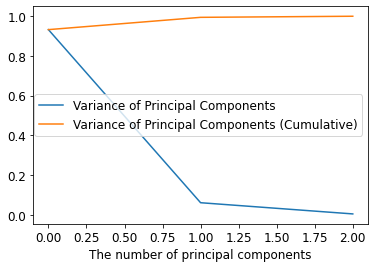

In [ ]:
plt.plot(variance, label='Variance of Principal Components')
plt.plot(np.cumsum(variance), label='Variance of Principal Components (Cumulative)')
plt.xlabel('The number of principal components')
plt.legend()

comp_X.shape: (240, 3)


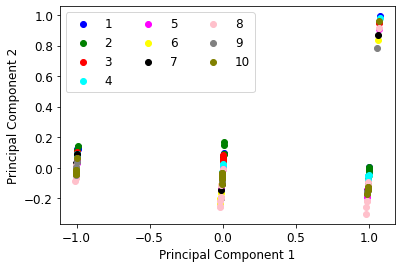

In [ ]:
# plot scatter plot with the 1st and 2nd principal components
comp_X = pca.transform(X)
print('comp_X.shape:', comp_X.shape)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black','pink','gray','olive']
for label, color in zip(np.unique(df.iloc[:,-1]), colors):
    class_embeddings = comp_X[df.iloc[:,-1] == label]
    plt.rcParams.update({'font.size': 12})
    plt.scatter(class_embeddings[:, 0], class_embeddings[:,1], c=color, label=label)
    plt.legend(ncol=3)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")

## 4.2 &nbsp;Use Principal Components as inputs

In [ ]:
# cross validation
clf = RandomForestClassifier(max_depth=5, random_state=0)
cv = 3
val_score = cross_val(comp_X, y, clf, cv, random_state=32, shuffle=True)
val_score

Cross Validation: 1 - Accuracy: 0.325
Cross Validation: 2 - Accuracy: 0.3375
Cross Validation: 3 - Accuracy: 0.35


,CV_1,CV_2,CV_3,Mean
accuracy,0.325,0.3375,0.35,0.3375


## 4.3 &nbsp; use features normalized / standarized as inputs 

CV Accuracy（RandomForestClassifier）：<br>
Cross Validation: 1 - Accuracy: 0.4752475247524752 <br>
Cross Validation: 2 - Accuracy: 0.42<br>
Cross Validation: 3 - Accuracy: 0.44<br>

### normalized features



In [ ]:
X = df_n.iloc[:, :-1]
clf = RandomForestClassifier(max_depth=5, random_state=0)
cv = 3
val_score = cross_val(X, y, clf, cv, random_state=32, shuffle=True)
val_score

Cross Validation: 1 - Accuracy: 0.4125
Cross Validation: 2 - Accuracy: 0.425
Cross Validation: 3 - Accuracy: 0.425


,CV_1,CV_2,CV_3,Mean
accuracy,0.4125,0.425,0.425,0.420833


In [ ]:
X = df_n.iloc[:, :-1]

# PCA
n_components = 3
pca = PCA(n_components = n_components, random_state=3)
pca.fit(X)
variance = pca.explained_variance_ratio_
comp_X = pca.transform(X)

clf = RandomForestClassifier(max_depth=5, random_state=0)
cv = 3
val_score = cross_val(comp_X, y, clf, cv, random_state=32, shuffle=True)
val_score

Cross Validation: 1 - Accuracy: 0.2875
Cross Validation: 2 - Accuracy: 0.3125
Cross Validation: 3 - Accuracy: 0.3375


,CV_1,CV_2,CV_3,Mean
accuracy,0.2875,0.3125,0.3375,0.3125


### Standarized features

In [ ]:
X = df_s.iloc[:, :-1]
clf = RandomForestClassifier(max_depth=5, random_state=0)
cv = 3
val_score = cross_val(X, y, clf, cv, random_state=32, shuffle=True)
val_score

Cross Validation: 1 - Accuracy: 0.4
Cross Validation: 2 - Accuracy: 0.4125
Cross Validation: 3 - Accuracy: 0.425


,CV_1,CV_2,CV_3,Mean
accuracy,0.4,0.4125,0.425,0.4125


In [ ]:
X = df_s.iloc[:, :-1]

# PCA
n_components = 3 
pca = PCA(n_components = n_components, random_state=3)
pca.fit(X)
variance = pca.explained_variance_ratio_
comp_X = pca.transform(X)

clf = RandomForestClassifier(max_depth=5, random_state=0)
cv = 3
val_score = cross_val(comp_X, y, clf, cv, random_state=32, shuffle=True)
val_score

Cross Validation: 1 - Accuracy: 0.275
Cross Validation: 2 - Accuracy: 0.4
Cross Validation: 3 - Accuracy: 0.2875


,CV_1,CV_2,CV_3,Mean
accuracy,0.275,0.4,0.2875,0.320833


## 4.4 &nbsp;imbalanced y label

X_train.shape (before random over sampler):  (160, 7)
X_train.shape (after random over sampler):  (160, 7)
Cross Validation: 1 - Accuracy: 0.4
Cross Validation: 2 - Accuracy: 0.425
Cross Validation: 3 - Accuracy: 0.4375


,CV_1,CV_2,CV_3,Mean
accuracy,0.4,0.425,0.4375,0.420833


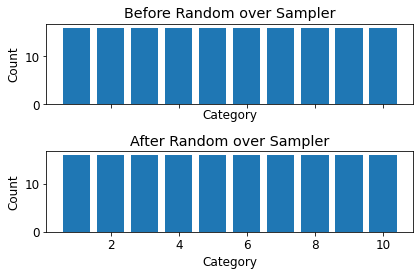

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

X = df.iloc[:, :-1]
cv = 3
skf = StratifiedKFold(n_splits=cv, random_state=32, shuffle=True)
val_score = []

k = 1
X = np.array(X)
for train_index, test_index in skf.split(X, y):
  # print('train -  {}   |   test -  {}'.format(
  #     np.bincount(y[train_index]), np.bincount(y[test_index])))
  X_train, X_test = X[train_index,:], X[test_index,:]
  y_train, y_test = y[train_index], y[test_index]
  
  if k == 1:
    print('X_train.shape (before random over sampler): ', X_train.shape)
    categories = np.arange(1,11)
    cat_count = [sum(y_train==ele) for ele in categories]
    fig, axs = plt.subplots(2,1, sharex=True)
    axs[0].bar(categories, cat_count)
    axs[0].set_xlabel('Category')
    axs[0].set_ylabel('Count')
    axs[0].set_title('Before Random over Sampler')

  # RandomOverSampler
  ros = RandomOverSampler(sampling_strategy='not majority',
                          random_state = 3)
  X_train, y_train = ros.fit_resample(X_train, y_train)

  if k == 1:
    print('X_train.shape (after random over sampler): ', X_train.shape)
    cat_count = [sum(y_train==ele) for ele in categories]
    axs[1].bar(categories, cat_count)
    axs[1].set_xlabel('Category')
    axs[1].set_ylabel('Count')
    axs[1].set_title('After Random over Sampler')
    plt.tight_layout()

  # Train
  clf = RandomForestClassifier(max_depth=5, random_state=0)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = sum(y_pred==y_test)  / len(y_test)
  val_score.append(accuracy)

  print(f'Cross Validation: {k} - Accuracy: {accuracy}')
  k += 1

val_score = pd.DataFrame(data = np.array([val_score+[np.mean(val_score)]]), 
                             index=['accuracy'],
                             # CV -- Cross Validation
                            columns=['CV_'+str(i) for i in range(1, cv+1)]+['Mean'])
val_score

In [ ]:
# RandomOverSampler + PCA
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

X = df.iloc[:, :-1]
cv = 3
skf = StratifiedKFold(n_splits=cv, random_state=32, shuffle=True)
val_score = []

# PCA
n_components = 3 
pca = PCA(n_components = n_components, random_state=3)
pca.fit(X)
variance = pca.explained_variance_ratio_
comp_X = pca.transform(X)

k = 1
for train_index, test_index in skf.split(comp_X, y):
  # print('train -  {}   |   test -  {}'.format(
  #     np.bincount(y[train_index]), np.bincount(y[test_index])))
  X_train, X_test = comp_X[train_index,:], comp_X[test_index,:]
  y_train, y_test = y[train_index], y[test_index]
  
  if k == 1:
    print('X_train.shape (before random over sampler): ', X_train.shape)

  # RandomOverSampler
  ros = RandomOverSampler(sampling_strategy='not majority',
                          random_state = 3)
  X_train, y_train = ros.fit_resample(X_train, y_train)

  if k == 1:
    print('X_train.shape (after random over sampler): ', X_train.shape)

  # Train
  clf = RandomForestClassifier(max_depth=5, random_state=0)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = sum(y_pred==y_test)  / len(y_test)
  val_score.append(accuracy)

  print(f'Cross Validation: {k} - Accuracy: {accuracy}')
  k += 1

val_score = pd.DataFrame(data = np.array([val_score+[np.mean(val_score)]]), 
                             index=['accuracy'],
                             # CV -- Cross Validation
                            columns=['CV_'+str(i) for i in range(1, cv+1)]+['Mean'])
val_score

X_train.shape (before random over sampler):  (160, 3)
X_train.shape (after random over sampler):  (160, 3)
Cross Validation: 1 - Accuracy: 0.325
Cross Validation: 2 - Accuracy: 0.3375
Cross Validation: 3 - Accuracy: 0.35


,CV_1,CV_2,CV_3,Mean
accuracy,0.325,0.3375,0.35,0.3375


In [ ]:
#  PCA + RandomOverSampler + CV function
def cross_val_pca_ros(X, y, clf, cv, 
                      n_components=3, # 
                      pca_random_state=3,
                      ros_random_state=3, 
                      split_random_state=32, split_shuffle=True):

  # PCA
  # pca = PCA(n_components = n_components, random_state=pca_random_state)
  # pca.fit(X)
  # comp_X = pca.transform(X)

  comp_X = np.array(X)

  # CV
  skf = StratifiedKFold(n_splits=cv, random_state=split_random_state, shuffle=split_shuffle)
  val_score = []

  k = 1
  for train_index, test_index in skf.split(comp_X, y):
    # print('train -  {}   |   test -  {}'.format(
    #     np.bincount(y[train_index]), np.bincount(y[test_index])))
    X_train, X_test = comp_X[train_index,:], comp_X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    if k == 1:
      print('X_train.shape (before random over sampler): ', X_train.shape)

    # RandomOverSampler
    # ros = RandomOverSampler(sampling_strategy='not majority',
    #                         random_state = ros_random_state)
    # X_train, y_train = ros.fit_resample(X_train, y_train)

    if k == 1:
      print('X_train.shape (after random over sampler): ', X_train.shape)

    # Train
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = sum(y_pred==y_test)  / len(y_test)
    val_score.append(accuracy)

    print(f'Cross Validation: {k} - Accuracy: {accuracy}')
    k += 1

  val_score = pd.DataFrame(data = np.array([val_score+[np.mean(val_score)]]), 
                              index=['accuracy'],
                              # CV -- Cross Validation
                              columns=['CV_'+str(i) for i in range(1, cv+1)]+['Mean'])
  return val_score
    

In [ ]:
X = df.iloc[:,:-1]
clf = RandomForestClassifier(max_depth=5, random_state=0)
cv=3
val_score = cross_val_pca_ros(X, y, clf, cv)
val_score

X_train.shape (before random over sampler):  (160, 7)
X_train.shape (after random over sampler):  (160, 7)
Cross Validation: 1 - Accuracy: 0.4
Cross Validation: 2 - Accuracy: 0.425
Cross Validation: 3 - Accuracy: 0.4375


,CV_1,CV_2,CV_3,Mean
accuracy,0.4,0.425,0.4375,0.420833


## 4.5 &nbsp;Other Models
https://scikit-learn.org/stable/supervised_learning.html

In [ ]:
X = df.iloc[:,:-1]

In [ ]:
X = df_n.iloc[:,:-1]

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=2)
val_score = cross_val_pca_ros(X, y, clf, cv=3)
val_score

X_train.shape (before random over sampler):  (160, 7)
X_train.shape (after random over sampler):  (160, 7)
Cross Validation: 1 - Accuracy: 0.25
Cross Validation: 2 - Accuracy: 0.175
Cross Validation: 3 - Accuracy: 0.1875


,CV_1,CV_2,CV_3,Mean
accuracy,0.25,0.175,0.1875,0.204167


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
val_score = cross_val_pca_ros(X, y, clf, cv=3)
val_score

X_train.shape (before random over sampler):  (160, 7)
X_train.shape (after random over sampler):  (160, 7)
Cross Validation: 1 - Accuracy: 0.225
Cross Validation: 2 - Accuracy: 0.2
Cross Validation: 3 - Accuracy: 0.1875


,CV_1,CV_2,CV_3,Mean
accuracy,0.225,0.2,0.1875,0.204167


In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(20),
                    random_state=1, max_iter=2000)
val_score = cross_val_pca_ros(X, y, clf, cv=3, n_components=5)
val_score

X_train.shape (before random over sampler):  (160, 7)
X_train.shape (after random over sampler):  (160, 7)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Cross Validation: 1 - Accuracy: 0.3375


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Cross Validation: 2 - Accuracy: 0.325
Cross Validation: 3 - Accuracy: 0.2625


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


,CV_1,CV_2,CV_3,Mean
accuracy,0.3375,0.325,0.2625,0.308333


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1,
     max_depth=3, random_state=0)
val_score = cross_val_pca_ros(X, y, clf, cv=3)
val_score

X_train.shape (before random over sampler):  (160, 7)
X_train.shape (after random over sampler):  (160, 7)
Cross Validation: 1 - Accuracy: 0.3375
Cross Validation: 2 - Accuracy: 0.375
Cross Validation: 3 - Accuracy: 0.3375


,CV_1,CV_2,CV_3,Mean
accuracy,0.3375,0.375,0.3375,0.35


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
val_score = cross_val_pca_ros(X, y, clf, cv=3)
val_score

X_train.shape (before random over sampler):  (160, 7)
X_train.shape (after random over sampler):  (160, 7)
Cross Validation: 1 - Accuracy: 0.2625
Cross Validation: 2 - Accuracy: 0.2375
Cross Validation: 3 - Accuracy: 0.2125


,CV_1,CV_2,CV_3,Mean
accuracy,0.2625,0.2375,0.2125,0.2375


## 4.6 &nbsp;AutoGluon
http://lucky521.github.io/blog/machinelearning/2019/07/20/AutoML.html#ray-tune <br>
https://auto.gluon.ai/stable/index.html

In [60]:
!pip install --upgrade mxnet
!pip install autogluon
from autogluon.tabular import TabularPredictor
# https://auto.gluon.ai/dev/api/autogluon.task.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X = df.iloc[:, :-1]

X = df_n.iloc[:, :-1]
# # PCA
# pca = PCA(n_components = n_components, random_state=3)
# pca.fit(X)
# comp_X = pca.transform(X)

comp_X = np.array(X)

# cv
cv = 3
split_random_state = 32
split_shuffle = True
skf = StratifiedKFold(n_splits=cv, random_state=split_random_state, shuffle=split_shuffle)

train_idx_list = []
test_idx_list = []
for train_index, test_index in skf.split(comp_X, y):
  train_idx_list.append(train_index)
  test_idx_list.append(test_index)

In [ ]:
train_idx_list

[array([  0,   1,   2,   3,   4,   6,   8,   9,  10,  13,  14,  15,  16,
         17,  20,  22,  26,  27,  28,  29,  31,  34,  35,  36,  38,  39,
         40,  41,  44,  46,  47,  48,  50,  51,  53,  54,  55,  56,  57,
         58,  59,  62,  63,  66,  68,  69,  70,  71,  72,  74,  75,  77,
         78,  79,  80,  82,  83,  85,  87,  88,  91,  92,  93,  94,  95,
         96,  97,  98, 100, 103, 104, 105, 107, 108, 110, 112, 115, 116,
        117, 119, 120, 121, 123, 124, 125, 127, 128, 129, 130, 131, 133,
        134, 138, 139, 140, 141, 142, 144, 145, 146, 148, 149, 150, 152,
        154, 155, 156, 159, 160, 161, 164, 166, 167, 169, 170, 171, 172,
        176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189, 190,
        192, 194, 195, 196, 197, 198, 203, 204, 205, 206, 207, 208, 209,
        210, 211, 216, 218, 219, 221, 222, 227, 228, 229, 230, 231, 232,
        234, 235, 237, 238]),
 array([  0,   3,   4,   5,   7,   8,  10,  11,  12,  18,  19,  20,  21,
         22,  23,  24

In [ ]:
test_idx_list

[array([  5,   7,  11,  12,  18,  19,  21,  23,  24,  25,  30,  32,  33,
         37,  42,  43,  45,  49,  52,  60,  61,  64,  65,  67,  73,  76,
         81,  84,  86,  89,  90,  99, 101, 102, 106, 109, 111, 113, 114,
        118, 122, 126, 132, 135, 136, 137, 143, 147, 151, 153, 157, 158,
        162, 163, 165, 168, 173, 174, 175, 177, 188, 191, 193, 199, 200,
        201, 202, 212, 213, 214, 215, 217, 220, 223, 224, 225, 226, 233,
        236, 239]),
 array([  1,   2,   6,   9,  13,  14,  15,  16,  17,  26,  29,  35,  36,
         39,  40,  41,  44,  46,  48,  50,  51,  59,  62,  63,  66,  69,
         71,  75,  77,  78,  79,  80,  82,  87,  92,  96,  98, 100, 105,
        107, 115, 116, 117, 120, 121, 123, 128, 129, 131, 142, 144, 149,
        152, 155, 160, 166, 169, 171, 172, 176, 181, 183, 184, 185, 187,
        190, 197, 198, 204, 208, 209, 216, 218, 219, 222, 228, 230, 231,
        234, 238]),
 array([  0,   3,   4,   8,  10,  20,  22,  27,  28,  31,  34,  38,  47,
         53

### Step_by_step

In [ ]:
# 1st CV
k = 0
train_index = train_idx_list[k]
test_index = test_idx_list[k]
X_train, X_test = comp_X[train_index,:], comp_X[test_index,:]
y_train, y_test = y[train_index], y[test_index]

# RandomOverSampler
# ros_random_state = 3
# ros = RandomOverSampler(sampling_strategy='not majority',
#                         random_state = ros_random_state)
# X_train, y_train = ros.fit_resample(X_train, y_train)

# features to DataFrame
columns = [i for i in range(X_train.shape[1])] + ['class']
df_train = pd.DataFrame(data = np.c_[X_train,y_train], columns=columns)
df_test = pd.DataFrame(data = np.c_[X_test,y_test], columns=columns)
print('df_train.shape: ', df_train.shape)
print('df_test.shape: ', df_test.shape)
df_train

df_train.shape:  (160, 7)
df_test.shape:  (80, 7)


,0,1,2,3,4,5,class
0,0.025000,-0.017969,0.023438,-0.042969,-0.001563,0.041406,1.0
1,0.007422,-0.110550,0.003516,-0.117970,-0.003906,0.114060,1.0
2,0.000781,-0.007422,-0.001953,-0.008203,-0.002734,0.005469,1.0
3,0.040625,-0.077734,0.038281,-0.118360,-0.002344,0.116020,1.0
4,0.017578,0.005078,0.015625,-0.012500,-0.001953,0.010547,1.0
...,...,...,...,...,...,...,...
155,-0.056250,-0.016016,-0.001953,0.040234,0.054297,0.014063,10.0
156,-0.066406,-0.025000,-0.021094,0.041406,0.045312,0.003906,10.0
157,0.000781,-0.019141,-0.008984,-0.019922,-0.009766,0.010156,10.0
158,-0.058984,-0.023828,-0.041406,0.035156,0.017578,-0.017578,10.0


In [ ]:
# Auto Train
predictor = TabularPredictor(label='class',
                             problem_type = 'multiclass',
                             eval_metric = 'accuracy',).fit(df_train)

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220901_073657/"
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ...
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20220901_073657/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.13
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    160
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 6
INFO:autogluon.tabular.learner.default_learner:Label Column: class
INFO:autogluon.tabular.learner.default_learner:Preprocessing data ...
INFO:autogluon.tabular.learner.default_learner:Train Data Class Count: 10
INFO:autogluon.tabular.learner.default_learner:Using Feature Generators to preprocess the data ...
INFO:autogluon.

In [ ]:
test_result = predictor.leaderboard(df_test, silent=True)
test_result

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMLarge,0.4375,0.40625,0.002950,0.002178,0.511274,0.002950,0.002178,0.511274,1,True,13
1,XGBoost,0.4375,0.40625,0.008551,0.004875,0.363998,0.008551,0.004875,0.363998,1,True,11
2,ExtraTreesGini,0.4250,0.43750,0.118301,0.102427,0.700223,0.118301,0.102427,0.700223,1,True,9
3,RandomForestGini,0.4125,0.43750,0.112145,0.102351,0.697349,0.112145,0.102351,0.697349,1,True,6
4,RandomForestEntr,0.4125,0.46875,0.113320,0.102500,0.697885,0.113320,0.102500,0.697885,1,True,7
5,LightGBM,0.4000,0.46875,0.014266,0.004051,0.365437,0.014266,0.004051,0.365437,1,True,5
6,KNeighborsDist,0.4000,0.37500,0.104449,0.104699,0.005237,0.104449,0.104699,0.005237,1,True,2
7,ExtraTreesEntr,0.4000,0.46875,0.116542,0.102762,0.703716,0.116542,0.102762,0.703716,1,True,10
8,WeightedEnsemble_L2,0.3875,0.53125,0.037811,0.012354,2.093273,0.004096,0.000335,0.244413,2,True,14
9,CatBoost,0.3750,0.43750,0.001587,0.001099,1.132872,0.001587,0.001099,1.132872,1,True,8


In [ ]:
# check models
predictor.get_model_names()

['KNeighborsUnif',
 'KNeighborsDist',
 'NeuralNetFastAI',
 'LightGBMXT',
 'LightGBM',
 'RandomForestGini',
 'RandomForestEntr',
 'CatBoost',
 'ExtraTreesGini',
 'ExtraTreesEntr',
 'XGBoost',
 'NeuralNetTorch',
 'LightGBMLarge',
 'WeightedEnsemble_L2']

In [ ]:
# best config
predictor.info()['model_info']['RandomForestEntr']

{'name': 'RandomForestEntr',
 'model_type': 'RFModel',
 'problem_type': 'multiclass',
 'eval_metric': 'accuracy',
 'stopping_metric': 'accuracy',
 'fit_time': 0.6948225498199463,
 'num_classes': 10,
 'quantile_levels': None,
 'predict_time': 0.10239505767822266,
 'val_score': 0.34375,
 'hyperparameters': {'n_estimators': 300,
  'max_leaf_nodes': 15000,
  'n_jobs': -1,
  'random_state': 0,
  'bootstrap': True,
  'criterion': 'entropy'},
 'hyperparameters_fit': {'n_estimators': 300},
 'hyperparameters_nondefault': ['criterion'],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': ['bool', 'int', 'float', 'category'],
  'valid_special_types': None,
  'ignored_type_group_special': None,
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'predict_1_batch_size': None},
 'num_features': 7,
 'features': ['0', '1', '2', '3', '4', '5', '6'],
 'feat

In [ ]:
y_pred = predictor.predict(df_test, model='WeightedEnsemble_L2')
y_true = df_test.iloc[:,-1]
# Accuracy (= score_test)
accuracy = sum(y_pred==y_true)  / len(y_true)
accuracy

0.45

### Function

#### model 0

In [ ]:
def clf_train_k(X, y, clf, k, train_idx_list, test_idx_list, 
                n_components=3, pca_random_state=3,
                ros_random_state = 3):
  # # PCA
  # pca = PCA(n_components = n_components, random_state=pca_random_state)
  # pca.fit(X)
  # comp_X = pca.transform(X)

  comp_X = np.array(X)

  train_index = train_idx_list[k]
  test_index = test_idx_list[k]
  X_train, X_test = comp_X[train_index,:], comp_X[test_index,:]
  y_train, y_test = y[train_index], y[test_index]

  # # RandomOverSampler
  
  # ros = RandomOverSampler(sampling_strategy='not majority',
  #                         random_state = ros_random_state)
  # X_train, y_train = ros.fit_resample(X_train, y_train)

  # Train
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = sum(y_pred==y_test)  / len(y_test)
  

  return clf, accuracy


In [ ]:
mean_acc = 0
cv = 3
for k in range(cv):
  clf = RandomForestClassifier(max_depth=5, random_state=0)
  clf, accuracy = clf_train_k(X, y, clf, k, train_idx_list, test_idx_list)
  mean_acc += accuracy
  print(f'CV {k+1}：', accuracy)
print('Mean Accuracy：', mean_acc/cv)

CV 1： 0.3375
CV 2： 0.475
CV 3： 0.4375
Mean Accuracy： 0.4166666666666667


#### AutoML Model

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold

In [138]:
def autotrain_k(X, y, k, train_idx_list, test_idx_list, 
                n_components=10, pca_random_state=3,
                ros_random_state = 3):
  # # PCA
  # pca = PCA(n_components = n_components, random_state=pca_random_state)
  # pca.fit(X)
  # comp_X = pca.transform(X)

  comp_X = np.array(X)

  train_index = train_idx_list[k]
  test_index = test_idx_list[k]
  X_train, X_test = comp_X[train_index,:], comp_X[test_index,:]
  y_train, y_test = y[train_index], y[test_index]

  # RandomOverSampler
  # ros = RandomOverSampler(sampling_strategy='not majority',
  #                         random_state = ros_random_state)
  # X_train, y_train = ros.fit_resample(X_train, y_train)

  # to DataFrame
  columns = [i for i in range(X_train.shape[1])] + ['class']
  df_train = pd.DataFrame(data = np.c_[X_train,y_train], columns=columns)
  df_test = pd.DataFrame(data = np.c_[X_test,y_test], columns=columns)

  # AutoML
  predictor = TabularPredictor(label='class',
                               problem_type = 'multiclass',
                              #  eval_metric = 'accuracy',
                               eval_metric = 'f1_macro',
                               verbosity = 1, 
                               ).fit(df_train)

  return predictor, df_test


In [ ]:
# X = df.iloc[:80, 1:-1]
# y = df.iloc[:80,-1]

# X = df.iloc[80:160, 1:-1]
# y = df.iloc[80:160,-1]


# X = df.iloc[160:240, 1:-1]
# y = df.iloc[160:240,-1]

# X.index = np.arange(80)
# y.index = np.arange(80)

In [153]:
# without shoe no
# X = df_s.iloc[:, 1:-1]
X = df_n.iloc[:, 1:-1]

y = df.iloc[:,-1]


In [139]:
# with shoe no
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

X

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,1,0.025000,-0.017969,0.023438,-0.042969,-0.001563,0.041406,0.027734,0.014453,0.025781,...,0.038673,0.163250,0.037954,0.007015,0.011026,0.006441,0.006690,0.003455,0.001945,0.001913
1,1,0.007422,-0.110550,0.003516,-0.117970,-0.003906,0.114060,0.004297,-0.133590,-0.003516,...,0.033866,0.092112,0.030866,0.012267,0.004948,0.002649,0.004028,0.002719,0.004620,0.002064
2,1,0.000781,-0.007422,-0.001953,-0.008203,-0.002734,0.005469,0.004687,-0.033594,0.002734,...,0.028156,0.093553,0.056336,0.009689,0.004593,0.002575,0.002956,0.002281,0.003273,0.002248
3,1,0.040625,-0.077734,0.038281,-0.118360,-0.002344,0.116020,0.045703,-0.037891,0.046094,...,0.033878,0.082603,0.021464,0.004947,0.004866,0.002528,0.004151,0.004215,0.003310,0.001849
4,1,0.017578,0.005078,0.015625,-0.012500,-0.001953,0.010547,0.028125,-0.033594,0.007812,...,0.028536,0.068634,0.023027,0.009577,0.005303,0.002588,0.003319,0.004480,0.005150,0.003566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,3,0.000781,-0.019141,-0.008984,-0.019922,-0.009766,0.010156,-0.017578,-0.000391,-0.014453,...,0.013007,0.033872,0.016044,0.017514,0.011223,0.005518,0.001604,0.003699,0.002921,0.003194
236,3,-0.055859,0.002344,-0.028516,0.058203,0.027344,-0.030859,-0.012891,0.008203,-0.009766,...,0.009010,0.085237,0.029284,0.018743,0.004081,0.008107,0.004727,0.013117,0.005518,0.002529
237,3,-0.058984,-0.023828,-0.041406,0.035156,0.017578,-0.017578,-0.047266,0.001563,0.000000,...,0.011660,0.066883,0.014357,0.002634,0.003580,0.006042,0.003435,0.013687,0.005000,0.001929
238,3,-0.033203,0.027344,0.010547,0.060547,0.043750,-0.016797,-0.017578,0.019922,-0.001953,...,0.006871,0.062867,0.028269,0.012360,0.008847,0.006768,0.002351,0.005865,0.003046,0.002324


In [ ]:
# with shoe no df_n
X = df_n.iloc[:, :-1]
y = df.iloc[:,-1]


In [154]:

# # PCA
# n_components = 15
# pca = PCA(n_components = n_components, random_state=3)
# pca.fit(X)
# comp_X = pca.transform(X)

comp_X = np.array(X)

# cv
cv = 3
split_random_state = 32
split_shuffle = True
skf = StratifiedKFold(n_splits=cv, random_state=split_random_state, shuffle=split_shuffle)

train_idx_list = []
test_idx_list = []
for train_index, test_index in skf.split(comp_X, y):
  train_idx_list.append(train_index)
  test_idx_list.append(test_index)

In [155]:
# CV 1
k = 0
predictor, df_test = autotrain_k(X, y, k, train_idx_list, test_idx_list)
test_result1 = predictor.leaderboard(df_test, silent=True)
test_result1

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220901_173204/"
Level 25:autogluon.core.trainer.abstract_trainer:AutoGluon will gauge predictive performance using evaluation metric: 'f1_macro'


[17:34:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesEntr,0.755126,0.593492,0.118852,0.103904,0.939179,0.118852,0.103904,0.939179,1,True,10
1,ExtraTreesGini,0.715484,0.569206,0.117150,0.103895,0.939883,0.117150,0.103895,0.939883,1,True,9
2,NeuralNetTorch,0.707026,0.664444,0.027500,0.024018,1.382238,0.027500,0.024018,1.382238,1,True,12
3,NeuralNetFastAI,0.694791,0.787619,0.035501,0.023914,2.344780,0.035501,0.023914,2.344780,1,True,3
4,WeightedEnsemble_L2,0.694791,0.787619,0.038520,0.025053,3.604844,0.003019,0.001138,1.260064,2,True,14
5,CatBoost,0.693241,0.596190,0.019359,0.006065,114.864405,0.019359,0.006065,114.864405,1,True,8
6,RandomForestGini,0.686513,0.561111,0.114095,0.103714,0.945948,0.114095,0.103714,0.945948,1,True,6
7,RandomForestEntr,0.684244,0.569206,0.116164,0.103907,1.040783,0.116164,0.103907,1.040783,1,True,7
8,XGBoost,0.654521,0.594286,0.013825,0.009635,1.627688,0.013825,0.009635,1.627688,1,True,11
9,LightGBM,0.616306,0.641111,0.046805,0.009925,1.172553,0.046805,0.009925,1.172553,1,True,5


In [156]:
# CV 2
k = 1
predictor, df_test = autotrain_k(X, y, k, train_idx_list, test_idx_list)
test_result2 = predictor.leaderboard(df_test, silent=True)
test_result2

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220901_173415/"
Level 25:autogluon.core.trainer.abstract_trainer:AutoGluon will gauge predictive performance using evaluation metric: 'f1_macro'


[17:36:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch,0.651522,0.713889,0.026926,0.023296,1.374417,0.026926,0.023296,1.374417,1,True,12
1,CatBoost,0.629111,0.557381,0.020552,0.006005,148.635633,0.020552,0.006005,148.635633,1,True,8
2,NeuralNetFastAI,0.628189,0.812143,0.036888,0.023832,1.339181,0.036888,0.023832,1.339181,1,True,3
3,RandomForestGini,0.612912,0.586825,0.114572,0.107793,0.945031,0.114572,0.107793,0.945031,1,True,6
4,WeightedEnsemble_L2,0.604365,0.819762,0.145206,0.128428,2.578304,0.004793,0.001143,1.230772,2,True,14
5,RandomForestEntr,0.593444,0.601349,0.116369,0.103765,1.037750,0.116369,0.103765,1.037750,1,True,7
6,ExtraTreesGini,0.592788,0.492302,0.116506,0.103730,0.944165,0.116506,0.103730,0.944165,1,True,9
7,ExtraTreesEntr,0.592513,0.625952,0.217110,0.103669,0.952491,0.217110,0.103669,0.952491,1,True,10
8,LightGBMXT,0.570266,0.649048,0.019843,0.007425,1.043048,0.019843,0.007425,1.043048,1,True,4
9,KNeighborsUnif,0.557873,0.315000,0.103525,0.103453,0.008351,0.103525,0.103453,0.008351,1,True,1


In [157]:
# CV 3
k = 2
predictor,df_test = autotrain_k(X, y, k, train_idx_list, test_idx_list)
test_result3 = predictor.leaderboard(df_test, silent=True)
test_result3

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220901_173700/"
Level 25:autogluon.core.trainer.abstract_trainer:AutoGluon will gauge predictive performance using evaluation metric: 'f1_macro'


[17:38:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetFastAI,0.753210,0.660173,0.038695,0.027844,1.400502,0.038695,0.027844,1.400502,1,True,3
1,WeightedEnsemble_L2,0.721847,0.723095,0.070365,0.053926,3.664292,0.003516,0.001157,1.290367,2,True,14
2,NeuralNetTorch,0.679930,0.694524,0.028154,0.024925,0.973423,0.028154,0.024925,0.973423,1,True,12
3,LightGBMXT,0.631948,0.518968,0.019760,0.007728,1.041913,0.019760,0.007728,1.041913,1,True,4
4,ExtraTreesEntr,0.623457,0.513968,0.117137,0.103784,1.046594,0.117137,0.103784,1.046594,1,True,10
5,LightGBM,0.606995,0.432222,0.066783,0.007466,1.342636,0.066783,0.007466,1.342636,1,True,5
6,RandomForestEntr,0.600016,0.412143,0.115842,0.104131,1.050684,0.115842,0.104131,1.050684,1,True,7
7,RandomForestGini,0.588869,0.402381,0.116228,0.103729,0.939747,0.116228,0.103729,0.939747,1,True,6
8,CatBoost,0.587206,0.537143,0.013580,0.004640,70.083525,0.013580,0.004640,70.083525,1,True,8
9,ExtraTreesGini,0.553707,0.434286,0.117120,0.104049,0.955296,0.117120,0.104049,0.955296,1,True,9


In [158]:
# sort models alphabetical
test_result1 = test_result1.sort_values('model')
test_result2 = test_result2.sort_values('model')
test_result3 = test_result3.sort_values('model')

In [159]:
test_result_all = pd.concat((test_result1, test_result2,test_result3))
test_result_all = test_result_all.groupby(['model']).mean()
test_result_all.sort_values(by=['score_test'], ascending=False)

,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
model,,,,,,,,,,,
NeuralNetFastAI,0.692063,0.753312,0.037028,0.025197,1.694821,0.037028,0.025197,1.694821,1.0,1.0,3.0
NeuralNetTorch,0.679493,0.690952,0.027526,0.024080,1.243359,0.027526,0.024080,1.243359,1.0,1.0,12.0
WeightedEnsemble_L2,0.673668,0.776825,0.084697,0.069135,3.282480,0.003776,0.001146,1.260401,2.0,1.0,14.0
ExtraTreesEntr,0.657032,0.577804,0.151033,0.103786,0.979422,0.151033,0.103786,0.979422,1.0,1.0,10.0
CatBoost,0.636519,0.563571,0.017831,0.005570,111.194521,0.017831,0.005570,111.194521,1.0,1.0,8.0
RandomForestGini,0.629431,0.516772,0.114965,0.105079,0.943576,0.114965,0.105079,0.943576,1.0,1.0,6.0
RandomForestEntr,0.625901,0.527566,0.116125,0.103934,1.043072,0.116125,0.103934,1.043072,1.0,1.0,7.0
ExtraTreesGini,0.620660,0.498598,0.116925,0.103891,0.946448,0.116925,0.103891,0.946448,1.0,1.0,9.0
LightGBM,0.579137,0.563492,0.043278,0.007623,1.211798,0.043278,0.007623,1.211798,1.0,1.0,5.0


## 4.7 &nbsp;Final Model


In [ ]:
n_components = 30
pca_random_state = 3
ros_random_state = 3

X = df.iloc[:,:-1]

# 主成分降维
pca = PCA(n_components = n_components, random_state=pca_random_state)
pca.fit(X)
comp_X = pca.transform(X)

# 使用所有数据训练、测试
X_train, X_test = comp_X, comp_X
y_train, y_test = y, y

# 对类别个数较少的样本进行随机取样

ros = RandomOverSampler(sampling_strategy='not majority',
                        random_state = ros_random_state)
X_train, y_train = ros.fit_resample(X_train, y_train)

# 将训练集测试集转换成DataFrame
columns = [i for i in range(X_train.shape[1])] + ['class']
df_train = pd.DataFrame(data = np.c_[X_train,y_train], columns=columns)
df_test = pd.DataFrame(data = np.c_[X_test,y_test], columns=columns)

# 自动训练测试模型
predictor = TabularPredictor(label='class',
                              problem_type = 'multiclass',
                              eval_metric = 'accuracy',
                              verbosity = 1, # 显示少部分信息
                              ).fit(df_train)

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220811_000149/"
Level 25:autogluon.core.trainer.abstract_trainer:AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'


In [ ]:
# 测试训练数据
predictor.leaderboard(df_test, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.970100,0.914286,0.236515,0.110237,2.974036,0.003935,0.000520,0.341578,2,True,14
1,ExtraTreesEntr,0.963455,0.895238,0.218377,0.102695,0.930031,0.218377,0.102695,0.930031,1,True,10
2,LightGBM,0.960133,0.876190,0.059111,0.011930,1.913142,0.059111,0.011930,1.913142,1,True,5
3,CatBoost,0.956811,0.876190,0.005124,0.003579,24.038169,0.005124,0.003579,24.038169,1,True,8
4,NeuralNetTorch,0.956811,0.876190,0.010516,0.005255,2.180157,0.010516,0.005255,2.180157,1,True,12
5,XGBoost,0.956811,0.876190,0.014203,0.007023,1.702427,0.014203,0.007023,1.702427,1,True,11
6,LightGBMXT,0.956811,0.866667,0.068116,0.012377,2.440791,0.068116,0.012377,2.440791,1,True,4
7,LightGBMLarge,0.956811,0.866667,0.118110,0.017116,7.282402,0.118110,0.017116,7.282402,1,True,13
8,RandomForestGini,0.953488,0.866667,0.216934,0.102543,0.923740,0.216934,0.102543,0.923740,1,True,6
9,ExtraTreesGini,0.950166,0.857143,0.223722,0.102630,0.934250,0.223722,0.102630,0.934250,1,True,9


In [ ]:
# 加载需要提要的测试数据
df_submit = pd.read_csv('/content/data/近红外光谱数据_测试集.csv', header=None, index_col=0)
df_submit

,1,2,3,4,5,6,7,8,9,10,...,692,693,694,695,696,697,698,699,700,701
0,,,,,,,,,,,,,,,,,,,,,
1,0.128543,0.128437,0.128335,0.128242,0.128168,0.128117,0.128095,0.128100,0.128124,0.128161,...,0.267570,0.267704,0.267853,0.268036,0.268266,0.268549,0.268883,0.269242,0.269592,0.269933
2,0.122109,0.122045,0.121987,0.121941,0.121909,0.121890,0.121884,0.121889,0.121912,0.121961,...,0.260191,0.260166,0.260158,0.260168,0.260208,0.260303,0.260476,0.260686,0.260868,0.261006
3,0.134325,0.134297,0.134276,0.134268,0.134277,0.134302,0.134341,0.134391,0.134455,0.134539,...,0.250831,0.251036,0.251206,0.251404,0.251659,0.251950,0.252246,0.252533,0.252813,0.253103
4,0.147585,0.147581,0.147577,0.147570,0.147565,0.147568,0.147582,0.147607,0.147651,0.147721,...,0.268502,0.268714,0.268927,0.269148,0.269390,0.269678,0.270028,0.270397,0.270718,0.270972
5,0.118670,0.118687,0.118702,0.118716,0.118735,0.118765,0.118813,0.118880,0.118968,0.119078,...,0.246137,0.246257,0.246371,0.246547,0.246808,0.247107,0.247388,0.247633,0.247850,0.248065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.127848,0.127808,0.127785,0.127797,0.127838,0.127899,0.127964,0.128027,0.128100,0.128196,...,0.269321,0.269370,0.269383,0.269435,0.269564,0.269742,0.269933,0.270119,0.270301,0.270491
73,0.131379,0.131342,0.131304,0.131269,0.131246,0.131246,0.131276,0.131336,0.131419,0.131517,...,0.255337,0.255395,0.255445,0.255543,0.255714,0.255925,0.256141,0.256347,0.256547,0.256760
74,0.130476,0.130445,0.130434,0.130455,0.130499,0.130553,0.130600,0.130634,0.130677,0.130751,...,0.265218,0.265246,0.265234,0.265259,0.265367,0.265537,0.265742,0.265945,0.266115,0.266256


In [ ]:
X_submit = df_submit
# 主成分降维
comp_X_submit = pca.transform(X_submit)
print('comp_X_submit.shape:', comp_X_submit.shape)

# 转化为dataframe格式，以供预测
columns = [i for i in range(comp_X_submit.shape[1])] 
comp_X_submit_df = pd.DataFrame(data = comp_X_submit, columns=columns)
comp_X_submit_df

comp_X_submit.shape: (76, 30)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.175082,-0.146153,0.035632,0.021096,0.027883,-0.007445,-0.000693,-0.002013,-0.002765,0.000467,...,-6.800040e-05,-0.000193,0.000108,0.000232,-0.000143,0.000065,0.000089,0.000008,0.000089,-0.000087
1,0.152232,-0.255989,0.031277,0.048899,-0.014380,-0.004634,-0.006077,0.001551,-0.001293,0.000430,...,-1.998098e-04,-0.000005,0.000103,-0.000026,0.000030,0.000080,-0.000161,0.000037,-0.000056,0.000175
2,-0.058556,0.217477,-0.038830,0.014121,0.003520,-0.004664,-0.003018,0.003804,-0.002605,-0.001931,...,-3.185941e-04,0.000184,-0.000106,0.000359,0.000062,-0.000008,0.000114,-0.000074,0.000178,0.000041
3,0.290734,0.397307,-0.031447,0.012655,0.013854,-0.003125,-0.001606,0.005386,-0.001695,-0.002036,...,-2.567786e-04,0.000024,-0.000035,0.000114,0.000058,0.000026,-0.000104,0.000050,0.000008,-0.000046
4,-0.195989,-0.029469,-0.056392,-0.006877,0.003874,-0.007249,0.001571,0.001458,-0.000960,-0.000666,...,1.992224e-04,0.000025,-0.000222,0.000063,0.000038,-0.000051,-0.000070,-0.000009,0.000027,0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.301612,0.038319,-0.050459,-0.019406,-0.013843,0.004146,0.000340,-0.002375,-0.000237,-0.003004,...,-9.002711e-07,-0.000088,-0.000026,-0.000041,0.000072,0.000158,-0.000102,-0.000032,-0.000033,-0.000023
72,0.004095,0.107762,-0.021578,-0.010109,-0.004354,0.006813,-0.000120,-0.001732,-0.002483,-0.000006,...,7.088083e-05,-0.000250,-0.000035,0.000036,0.000090,0.000228,0.000008,-0.000118,-0.000095,0.000076
73,0.185800,0.079107,-0.025451,-0.021266,-0.008537,-0.000157,-0.002816,-0.002008,-0.000226,-0.000096,...,1.099423e-05,-0.000135,-0.000055,-0.000116,0.000098,0.000049,-0.000010,0.000047,-0.000097,-0.000052
74,0.416043,-0.052026,-0.009459,-0.000678,-0.027302,0.000557,0.000815,-0.002897,-0.002013,-0.001024,...,4.649199e-05,-0.000142,-0.000011,-0.000067,0.000071,0.000041,-0.000153,0.000027,0.000029,-0.000158


In [ ]:
# 使用自动优化后确定的模型ExtraTreesEntr来作最终预测
y_pred_submit = predictor.predict(comp_X_submit_df, model='ExtraTreesEntr')
y_pred_submit

0     5.0
1     4.0
2     2.0
3     3.0
4     4.0
     ... 
71    1.0
72    1.0
73    1.0
74    1.0
75    2.0
Name: class, Length: 76, dtype: float64

In [ ]:
# 使用['A', 'B', 'C', ...] 代替 [0,1,2,...]
categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
for i, cat in enumerate(categories):
    y_pred_submit = y_pred_submit.replace(i, cat)
y_pred_submit

0     F
1     E
2     C
3     D
4     E
     ..
71    B
72    B
73    B
74    B
75    C
Name: class, Length: 76, dtype: object

categories: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
cat_count: [7, 6, 13, 3, 9, 20, 18]
sum: 76


Text(0.5, 0, 'Category')

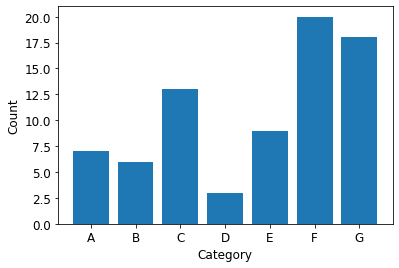

In [ ]:
cat_count = [sum(y_pred_submit==ele) for ele in categories]
# 绘制测试类别分布图
print('categories:', categories)
print('cat_count:', cat_count)
print('sum:', sum(cat_count))
plt.bar(categories, cat_count)
plt.ylabel('Count')
plt.xlabel('Category')

In [ ]:
# 保存预测结果
y_pred_submit = pd.DataFrame(y_pred_submit)
y_pred_submit.index.name = '预测集样本序号'
y_pred_submit.index = y_pred_submit.index+1
y_pred_submit.columns = ['类别预测值']
y_pred_submit

,类别预测值
预测集样本序号,
1,F
2,E
3,C
4,D
5,E
...,...
72,B
73,B
74,B


In [ ]:
y_pred_submit.to_csv('/content/预测结果.csv', encoding='utf_8_sig')